# Chapter 17: Representation Learning and Generative Learning Using Autoencoders and GANs

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## PCA with undercomplete linear autoencoder

In [ ]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [13]:
# build dataset
np.random.seed(42)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data
    
X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [2]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=0.1))

In [15]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 2/20
2/2 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 3/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0859
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0735
Epoch 5/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0638
Epoch 6/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0558
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 8/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0441
Epoch 9/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0359
Epoch 11/20
2/2 [==============================] - 0s 1ms/step - loss: 0.0326
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0299
Epoch 13/20
2/2 [==============================] - 0s 2ms/step - loss: 0.

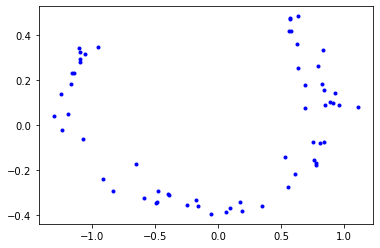

In [19]:
codings = encoder.predict(X_train)

plt.plot(codings[:, 0], codings[:, 1], 'b.')

## Stacked autoencoder for MNIST